In [1]:
import pandas as pd
import h5py as h
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.optimize import curve_fit
%matplotlib widget

In [2]:
def slope_fix(data):
    def line(x, a, b):
        return a*x + b
    xdata = np.arange(len(data))
    popt, pcov = curve_fit(line, xdata, data)
    return (data - line(xdata,*popt), pcov)

def line(x, a, b):
        return a*x + b

def fit_line(xdata,ydata):
    def line(x, a, b):
            return a*x + b
    popt,pcov = curve_fit(line,xdata,ydata)
    return popt, pcov

In [3]:
fname = "/Volumes/ME424_HD/nanopores/2023_02_20/ch1/pore2/data3/EVENTS.hdf5"
df = pd.read_pickle("/Volumes/ME424_HD/nanopores/2023_02_07/ch2/pore8/data2/df_filt.pkl")
file = h.File(fname)["current_data"]

In [4]:
len(df)

51

Text(0.5, 1.0, '[0.11513277 0.08358301 0.10482612 0.1695282  0.07615793 0.07421996]')

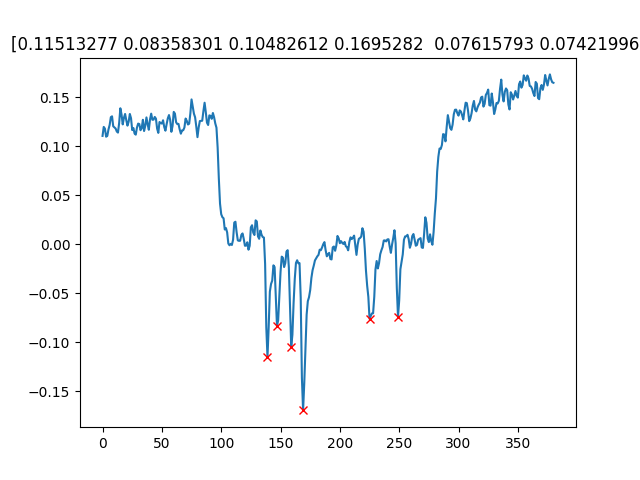

In [14]:
plt.close("all")
new_df = pd.DataFrame()
dict = df.iloc[10]
data = file[dict["name"]][:]
cropped = data[100:-100]
peaks_mask = np.where(cropped < np.mean(cropped) - 0.5*np.std(cropped), False, True)
popt, pcov = fit_line(np.arange(len(cropped))[peaks_mask] + 99, cropped[peaks_mask])
flat = data - line(np.arange(len(data)), *popt)
peaks = sig.find_peaks(-flat, height =0.03, distance = 5)
row = pd.DataFrame([pd.Series(data = [dict["name"], peaks[0], -peaks[1]["peak_heights"]], index = ["name", "peak_locs", "peak_heights"])])
new_df = pd.concat([new_df, row], ignore_index=True)
plt.figure()
plt.plot(flat)
plt.plot(peaks[0],-peaks[1]["peak_heights"][:], 'rx', ls='none')
plt.title(str(peaks[1]["peak_heights"]))

In [ ]:
names = list(df.name)
for name in names[:10]:
    plt.figure()
    plt.plot()

In [10]:
file.close()

In [2]:
ag7=[0.0835,0.1083,0.0673,0.0787,0.0661,0.0908]
ag5=[0.2822,0.0841,0.0422,0.0565,0.0405,0.0843,0.0916,0.0842,0.0636,0.069,0.0549,0.0737,0.0711,0.077,0.0525,0.0751,0.0647,0.0767]
ag3=[0.0713,0.2085,0.0345,0.08085,0.0461,0.0297,0.0436,0.0297,0.0332,0.0546,0.0347,0.0474,0.0446,0.0665,0.0411,0.0473,0.0362,0.0578,0.0346,0.0316,0.0418,0.0653,0.05,0.0594,0.0292,0.0359]
x7=[0.0454,0.0735,0.0721,0.0738,0.0786,0.0892,0.1348,0.1935,0.0632,0.0861,0.0749,0.0792]

Text(0.5, 1.0, 'Peak Current Drop of Overhangs With and Without Clusters')

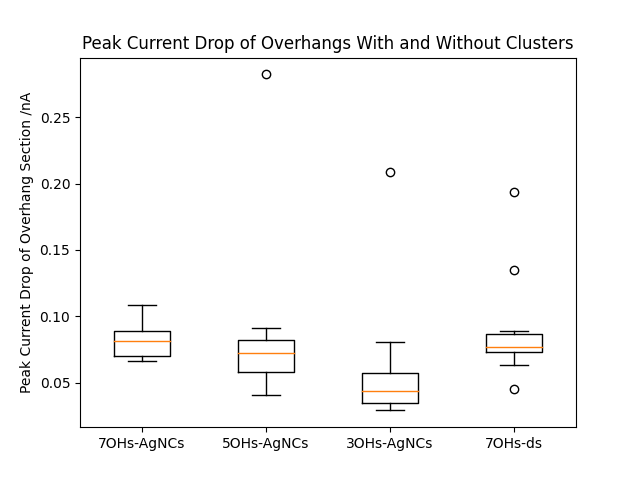

In [3]:
plt.figure()
plt.boxplot([ag7,ag5,ag3,x7], labels = ["7OHs-AgNCs", "5OHs-AgNCs","3OHs-AgNCs","7OHs-ds"])
plt.ylabel("Peak Current Drop of Overhang Section /nA")
plt.title("Peak Current Drop of Overhangs With and Without Clusters")

(array([1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 2., 1., 3., 1., 1., 1., 3.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.0752  , 0.078248, 0.081296, 0.084344, 0.087392, 0.09044 ,
        0.093488, 0.096536, 0.099584, 0.102632, 0.10568 , 0.108728,
        0.111776, 0.114824, 0.117872, 0.12092 , 0.123968, 0.127016,
        0.130064, 0.133112, 0.13616 , 0.139208, 0.142256, 0.145304,
        0.148352, 0.1514  , 0.154448, 0.157496, 0.160544, 0.163592,
        0.16664 , 0.169688, 0.172736, 0.175784, 0.178832, 0.18188 ,
        0.184928, 0.187976, 0.191024, 0.194072, 0.19712 , 0.200168,
        0.203216, 0.206264, 0.209312, 0.21236 , 0.215408, 0.218456,
        0.221504, 0.224552, 0.2276  ]),
 <BarContainer object of 50 artists>)

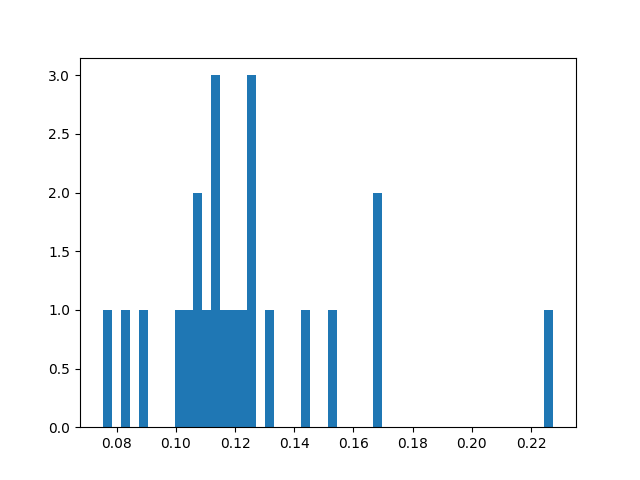

In [7]:
plt.figure()
plt.hist(agnc,bins=50)